In [1]:
!pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 69.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 70.9 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.6/195.6 kB 56.9 MB/s eta 0:00:00


In [2]:
from skimage import io
import os

result_dir = "result"

#Make Directory
if not os.path.exists(result_dir):
    os.makedirs(result_dir)

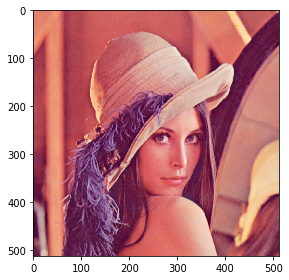

In [3]:
image = io.imread("Lenna.png")
io.imshow(image)

In [5]:
# 이미지 속성
# imread() 함수로 이미지를 load 한 이미지는 numpy array 이기때문에 속성 정보는 사이즈와 채널 정보
print('이미지 사이즈 : {}'.format(image.shape))
print('이미지 Width : {}'.format(image.shape[0]))
print('이미지 Height : {}'.format(image.shape[1]))

이미지 사이즈 : (512, 512, 3)
이미지 Width : 512
이미지 Height : 512


Resize (512, 512, 3) -> (85, 85, 3)


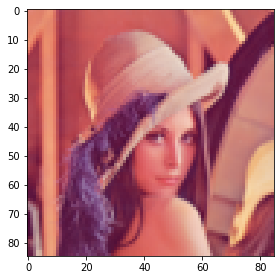

In [6]:
# 이미지 크기 변경
from skimage.transform import rescale, resize, downscale_local_mean
image = io.imread("Lenna.png")

#크기를 1/6 size로 변경
image_resized = resize(image, (image.shape[0] // 6, image.shape[1] // 6), anti_aliasing=True)

print("Resize {} -> {}".format(image.shape, image_resized.shape))
io.imshow(image_resized)

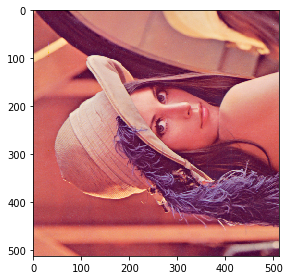

In [7]:
# 이미지 회전
from skimage.transform import rotate

image = io.imread("Lenna.png")

# 90도 회전
rotate_image = rotate(image, 90, resize=True)

io.imshow(rotate_image)

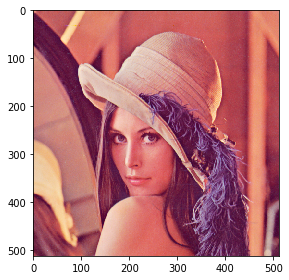

In [8]:
import numpy as np

#좌우대칭
flip_lr_image = np.fliplr(image)
io.imshow(flip_lr_image)

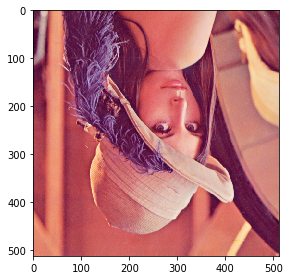

In [10]:
#상하반전
flip_ud_image = np.flipud(image)
io.imshow(flip_ud_image)

In [21]:
# 이미지 자르기(crop)
# [y1:y2, x1:x2]
image = io.imread("Lenna.png")

cropped_image = image[120:180, 180:180]
io.imshow(cropped_image)

ValueError: zero-size array to reduction operation minimum which has no identity

/home/szjung/.local/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


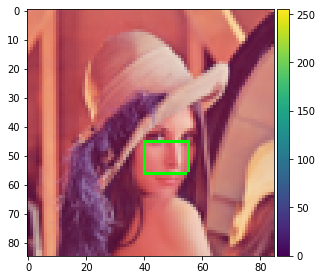

In [23]:
# Draw Box
import numpy as np
from skimage import io, draw

image = io.imread("Lenna.png")
image_resized = resize(image, (image.shape[0] // 6, image.shape[1] // 6), anti_aliasing=True)

color = np.array([0, 255, 0], dtype=np.uint8)
# x1, y1, w, h
bounding_box = (40, 45, 15, 11)

image_resized[bounding_box[1], bounding_box[0]:bounding_box[0] + bounding_box[2]] = color
image_resized[bounding_box[1]:bounding_box[1] + bounding_box[3], bounding_box[0]] = color

image_resized[bounding_box[1] + bounding_box[3], bounding_box[0]:bounding_box[0] + bounding_box[2]] = color
image_resized[bounding_box[1]:bounding_box[1] + bounding_box[3], bounding_box[0] + bounding_box[2]] = color

io.imshow(image_resized)

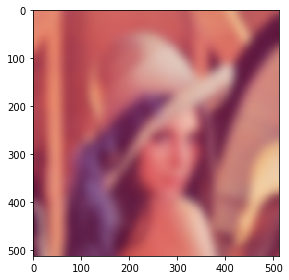

In [26]:
# 이미지 필터링
from skimage import filters
from skimage import io

image = io.imread("Lenna.png")
gaussian_filter_image = filters.gaussian(image, sigma=10)

io.imshow(gaussian_filter_image)

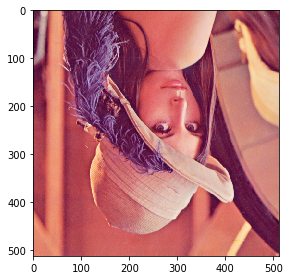

In [35]:
# 이미지 합치기
io.imshow(flip_lr_image)
#merge_image = np.concatenate((flip_lr_image, flip_ud_image), axis=1)
#io.imshow(merge_image)

In [ ]:
# 색상 모듈
from skimage import io
from 